Importing Libararies

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics
import datetime
import scipy
import seaborn as sns 

Loading dataset

In [41]:
df=pd.read_csv("trip.csv")

Exploring dataset

In [42]:
df.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [43]:
df.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

Univariate Analysis

In [44]:
df = df.sort_values(by='starttime')
df = df.reset_index(drop=True)
start = df.iloc[1]['starttime']
end = df.iloc[-1]['stoptime']
print("Date range of dfset:", start, "-", end)


Date range of dfset: 1/1/2015 0:37 - 9/9/2015 10:00


<Axes: title={'center': 'Distribution of genders'}, xlabel='gender'>

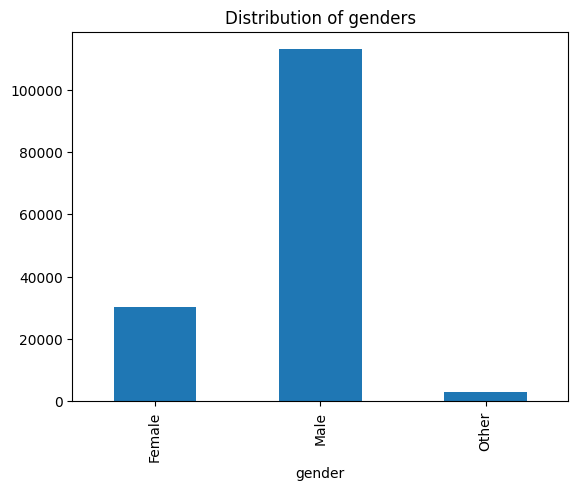

In [45]:
groupby_gender = df.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')


This graph shows that males dominate,second number is of females and last is of others category

<Axes: title={'center': 'Distribution of birth years'}, xlabel='birthyear'>

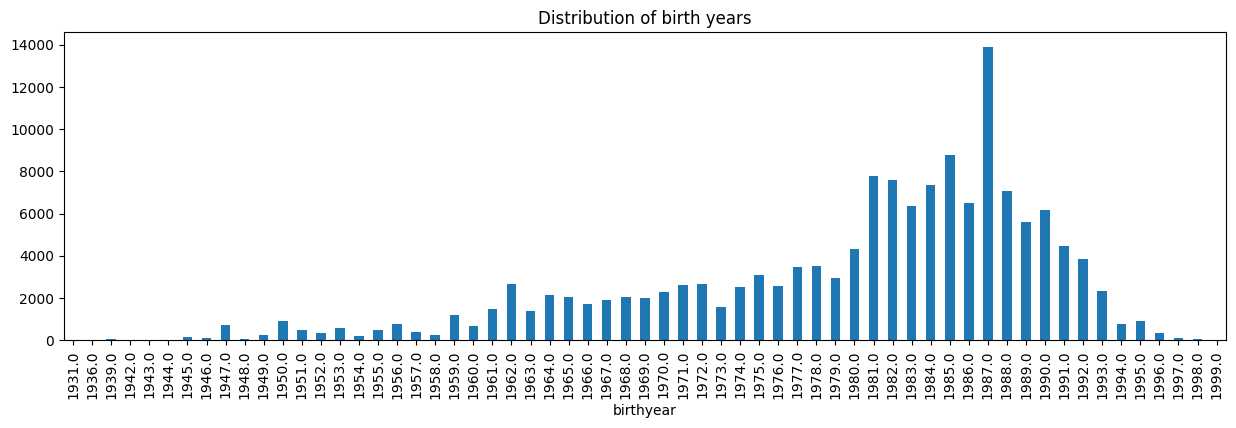

In [46]:
df = df.sort_values(by='birthyear')
groupby_birthyear = df.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years',  
figsize = (15,4))

The graph shows a rise in birth years peaking around 1987 with numbers gradually declining thereafter

<Axes: title={'center': 'Distribution of user types'}, xlabel='usertype'>

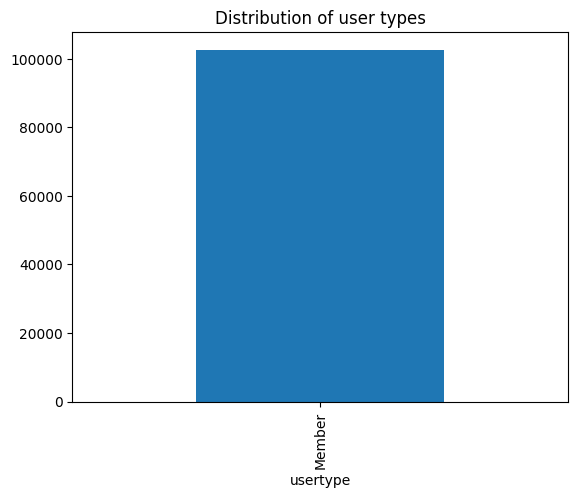

In [ ]:
dfmil = df[(df['birthyear'] >= 1977) & (df['birthyear']<=1994)]
groupbymil = dfmil.groupby('usertype').size()
groupbymil.plot.bar(title = 'Distribution of user types')

It shows that members range from 0-100000

<Axes: title={'center': 'User type distribution (all users)'}, xlabel='usertype'>

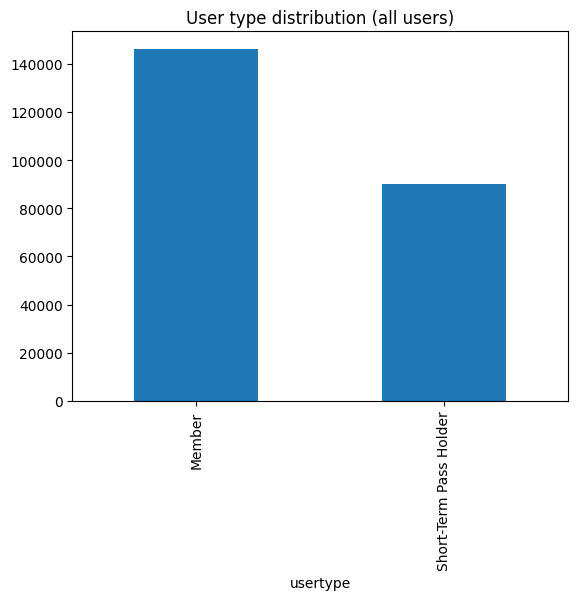

In [48]:
groupby_user = df.groupby('usertype').size()
groupby_user.plot.bar(title='User type distribution (all users)')



It shows that the Members of company ranges upto 140000 & Shprt term pass holders ranges from 80000 - 100000


Multivariate Analysis

<Axes: title={'center': 'Distribution of Stations by Gender'}, xlabel='from_station_name'>

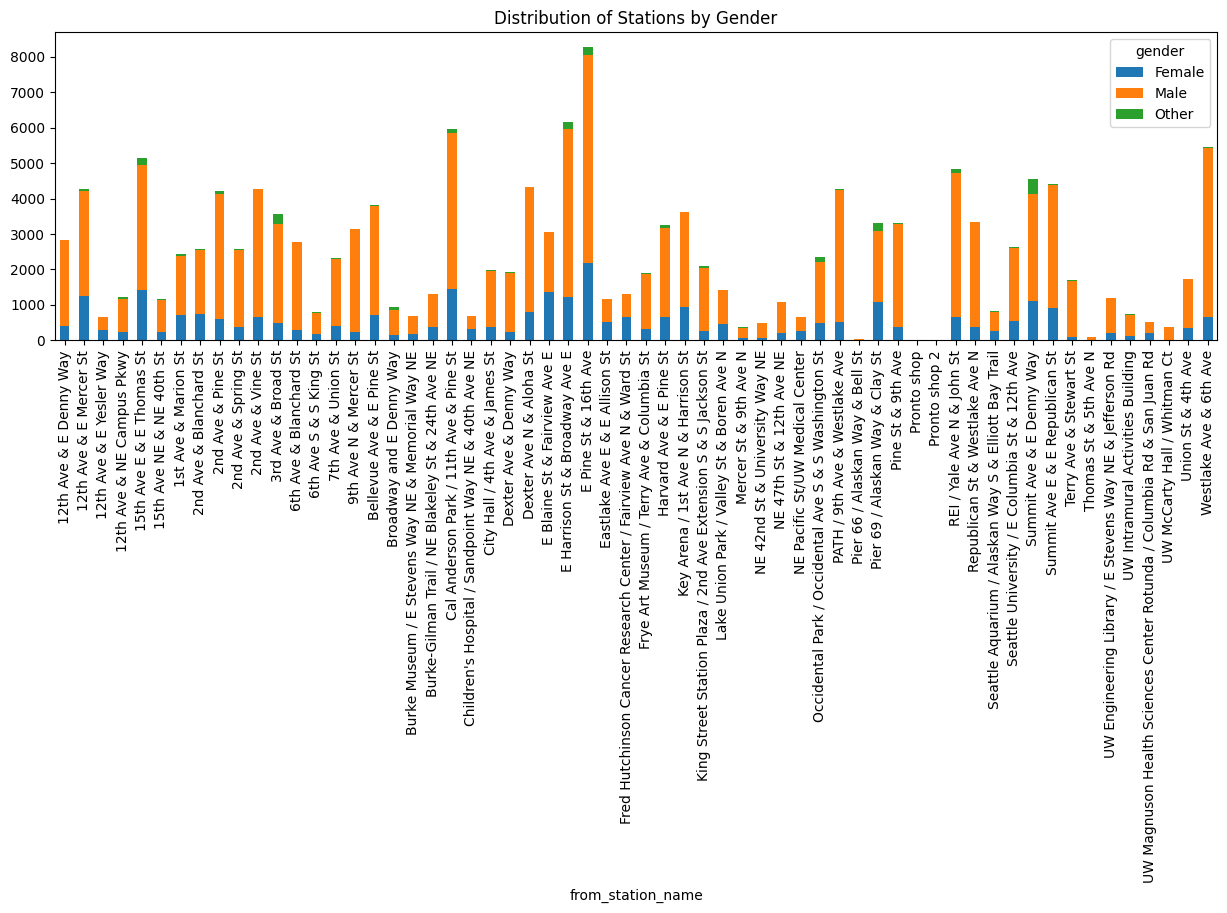

In [68]:
grouped = df.groupby(['from_station_name', 'gender']).size().unstack('gender').fillna(0)
grouped.plot.bar(stacked=True, figsize=(15, 4), title='Distribution of Stations by Gender')


It shows that the users of which stations are in which range. Males are dominating, females are at second number and others at the end 

<Axes: title={'center': 'Distribution of birth years by Gender'}, xlabel='birthyear'>

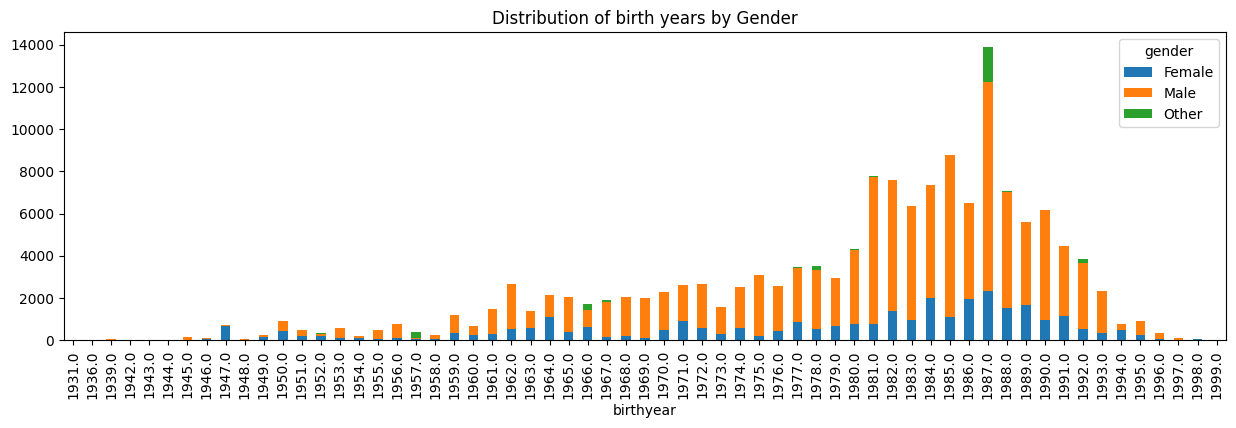

In [50]:
grouped = df.groupby(['birthyear', 'gender']).size().unstack('gender').fillna(0)
grouped.plot.bar(stacked=True, figsize=(15, 4), title='Distribution of birth years by Gender')


This shows in which year how many males,females,others are born.In almost all years male are dominating then females and others

<Axes: title={'center': 'Distribution of birth years by Usertype'}, xlabel='birthyear'>

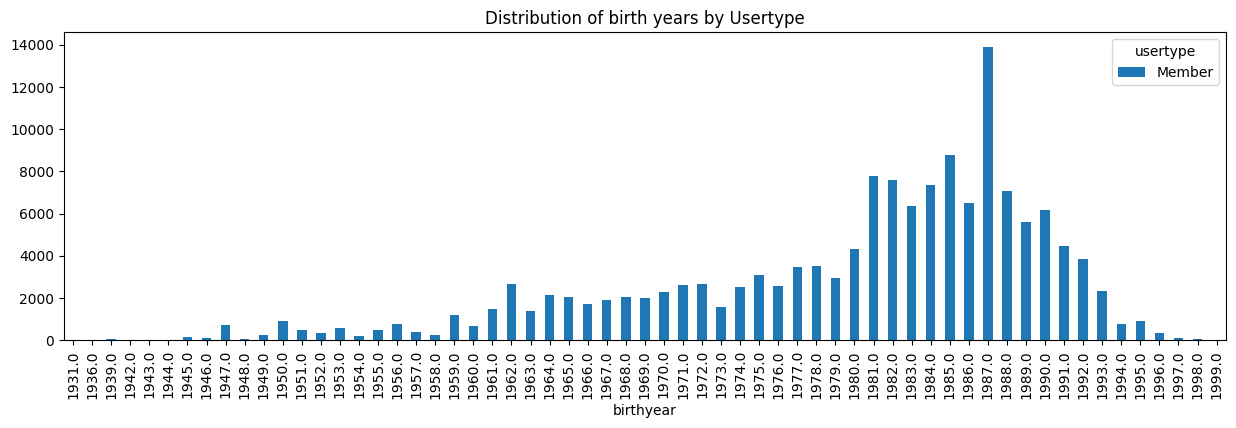

In [51]:
grouped = df.groupby(['birthyear', 'usertype']).size().unstack('usertype').fillna(0)
grouped.plot.bar(stacked=True, figsize=(15, 4), title='Distribution of birth years by Usertype')

It shows which user type belong to which birth year 

In [52]:
df[df['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [53]:
df[df['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [54]:
List_ = list(df['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
df['starttime_mod'] = pd.Series(List_,index=df.index)
df['starttime_date'] = pd.Series([x.date() for x in List_],index=df.index)
df['starttime_year'] = pd.Series([x.year for x in List_],index=df.index)
df['starttime_month'] = pd.Series([x.month for x in List_],index=df.index)
df['starttime_day'] = pd.Series([x.day for x in List_],index=df.index)
df['starttime_hour'] = pd.Series([x.hour for x in List_],index=df.index)

<Axes: title={'center': 'Distribution of Trip duration by date'}, xlabel='starttime_date'>

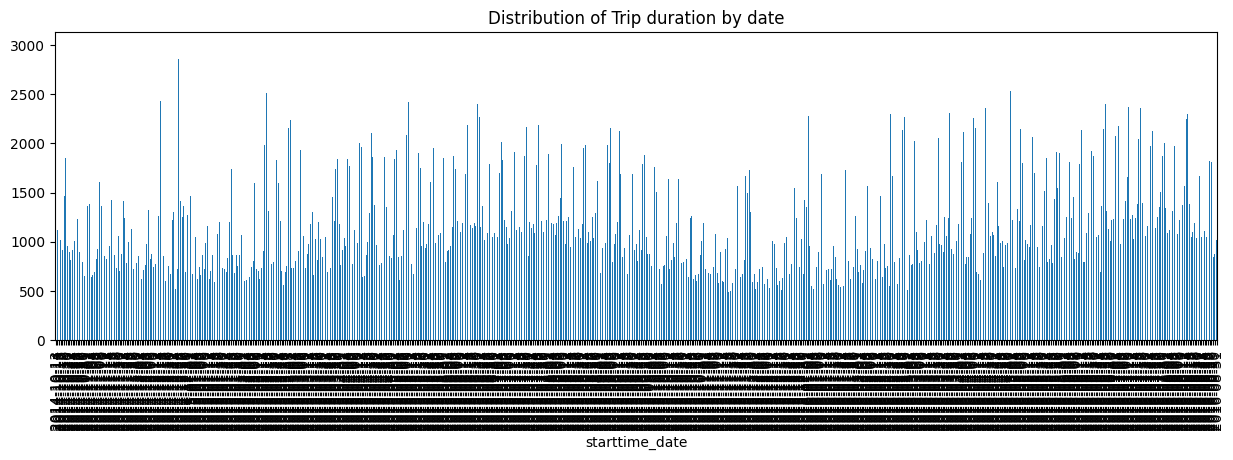

In [55]:
df.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date', figsize = (15,4))

It shows trip duration according to start date. But its very complex as bar plots are bnot suitable for date plotting

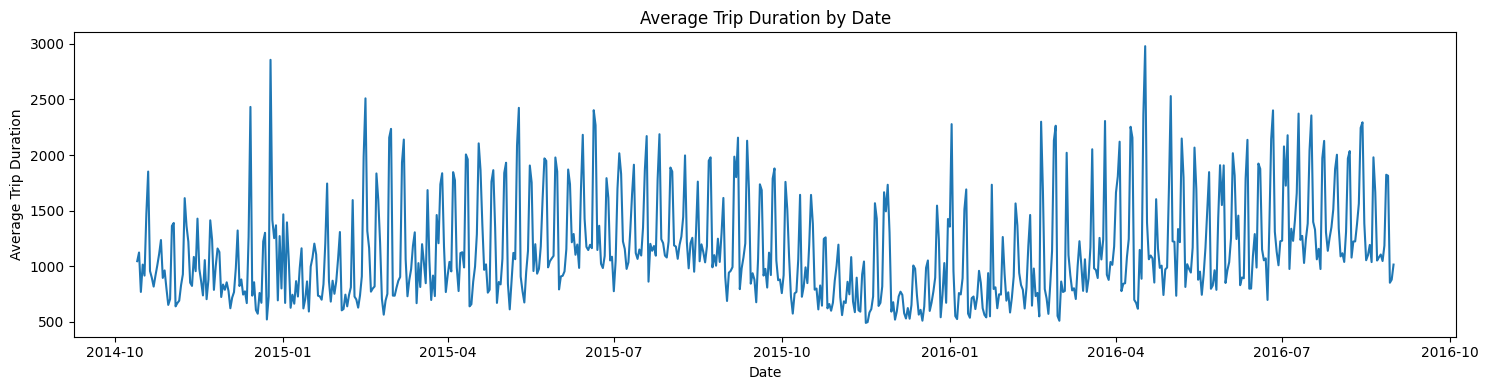

In [56]:
df.groupby('starttime_date')['tripduration'].mean().plot(kind='line', title='Average Trip Duration by Date', figsize=(15, 4))

plt.xlabel("Date")
plt.ylabel("Average Trip Duration")
plt.tight_layout()
plt.show()


Its the refined version of above plot but using with line chart 

 Measuring Center of Measure

In [57]:
trip_duration = list(df['tripduration'])
station_from = list(df['from_station_name'])
print("Mean of trip duration:", statistics.mean(df['tripduration']))
print("Median of trip duration:", statistics.median(df['tripduration']))
print("Most common starting station:", statistics.mode(df['from_station_name']))
print("Most common starting station:", statistics.mode(df['bikeid']))

Mean of trip duration: 1202.6122102556499
Median of trip duration: 633.235
Most common starting station: Pier 69 / Alaskan Way & Clay St
Most common starting station: SEA00281


In [72]:
df['tripduration'].max()

27985.884

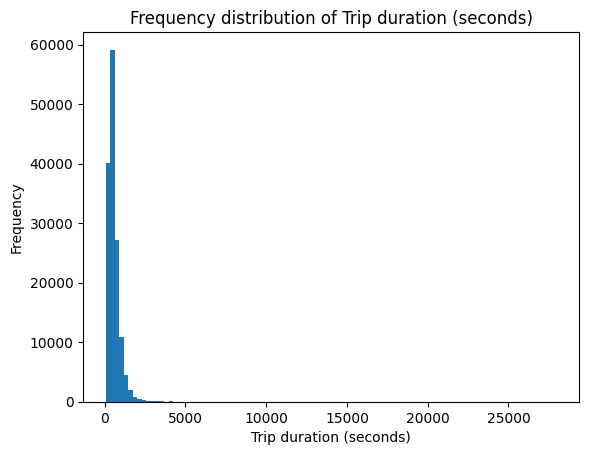

In [74]:
df['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration (seconds)')
plt.xlabel('Trip duration (seconds)')
plt.show()

The graph shows a high frequency of trips with short durations, dropping sharply beyond 500 units.

Outliers

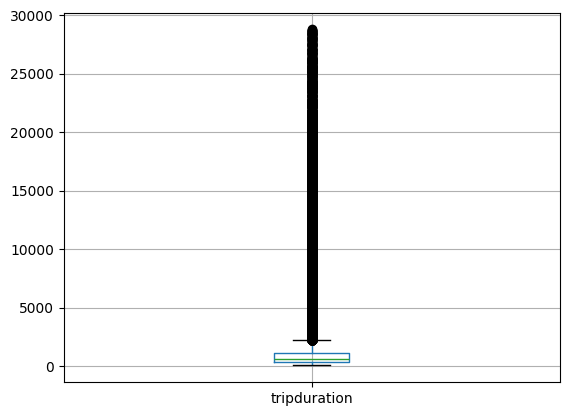

In [59]:
box = df.boxplot(column=['tripduration'])
plt.show()

It shows a large number of outliers

In [60]:
q25 = df['tripduration'].quantile(0.25)
q75 = df['tripduration'].quantile(0.75)
iqr = q75 - q25

lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

non_outliers = df[(df['tripduration'] >= lower_bound) & (df['tripduration'] <= upper_bound)]

outlier_count = len(df) - len(non_outliers)
proportion = (outlier_count * 100) / float(len(df))

print("Proportion of values that are outliers:", proportion, "percent")


Proportion of values that are outliers: 9.548217651917904 percent


In [61]:

upper_whisker = q75 + (1.5 * iqr)

filtered = [x for x in trip_duration if q25 - (1.5 * iqr) <= x <= upper_whisker]

mean_trip_duration = np.mean(filtered)

print("Mean of trip duration:", mean_trip_duration)


Mean of trip duration: 711.7265734972488


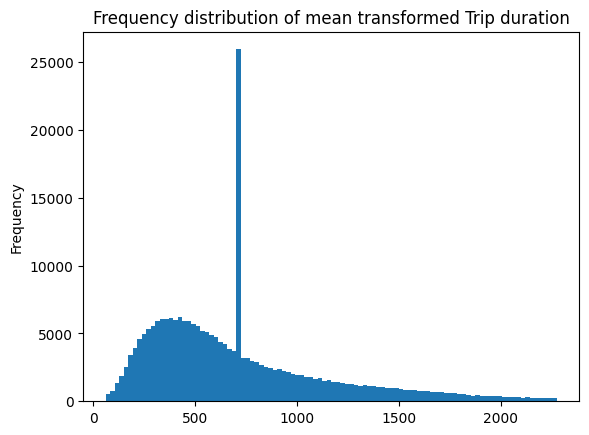

In [62]:
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x
df['tripduration_mean'] = df['tripduration'].apply(lambda x: transform_tripduration(x))
df['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

The graph shows a peak frequency of mean transformed trip durations between 500 -1000, with a sharp drop-off and a small spike near 0.

In [63]:
print("Mean of trip duration:", df['tripduration_mean'].mean())
print("Standard deviation of trip duration:", df['tripduration_mean'].std())
print("Median of trip duration:", df['tripduration_mean'].median())


Mean of trip duration: 711.7265734972486
Standard deviation of trip duration: 435.51729651425313
Median of trip duration: 633.235


Correlation

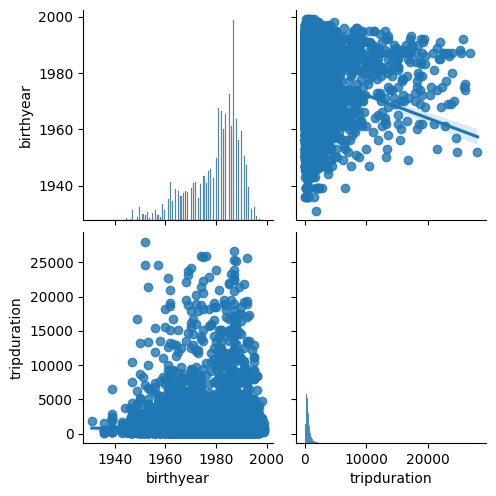

In [64]:
df = df.dropna()
sns.pairplot(df, vars=['birthyear', 'tripduration'], kind='reg')
plt.show()

The graph shows most people were born around 1980 and their trips usually last less than 2,500 units and few going longer

In [65]:

df['birthyear'] = pd.to_numeric(df['birthyear'], errors='coerce')
df['starttime_year'] = pd.to_numeric(df['starttime_year'], errors='coerce')
df = df.dropna(subset=['tripduration', 'birthyear', 'starttime_year'])
df['age'] = df['starttime_year'] - df['birthyear']
correlations = df[['tripduration', 'age']].corr(method='pearson')
print(correlations)


              tripduration       age
tripduration      1.000000  0.058127
age               0.058127  1.000000


Hypothesis Testing: Comparing Two Groups

In [77]:
from scipy import stats

for cat in ['gender', 'usertype']:
    print("Category:", cat, "\n")
    
    groupby_category = df.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    
    groupby_category = groupby_category.dropna()
    
    category_names = list(groupby_category.columns)
    
    for i in range(len(category_names)):
        for j in range(i + 1, len(category_names)):
            cat1 = category_names[i]
            cat2 = category_names[j]
            print(cat1, "vs", cat2)
            
            t_stat, p_val = stats.ttest_ind(groupby_category[cat1], groupby_category[cat2])
            print("Statistic:", t_stat, "P value:", p_val)
            print()


Category: gender 

Female vs Male
Statistic: -38.57375318422254 P value: 2.6503687548457693e-216

Female vs Other
Statistic: 48.234385881788334 P value: 1.0700965907985227e-289

Male vs Other
Statistic: 53.18028206776327 P value: 0.0

Category: usertype 





We conducted t-tests to compare the daily ride counts across different gender groups: Female vs Male, Female vs Other, and Male vs Other.The Female vs Male comparison gave a large negative t-statistic (-38.57) with a p-value of 2.65e-216, indicating that females had significantly fewer rides per day than males, and this difference is statistically significant.In the Female vs Other comparison, the t-statistic was +48.23 with a p-value of 1.07e-289, showing that females had significantly more rides than users in the 'Other' gender category.Finally, the Male vs Other comparison gave the highest t-statistic of +53.18 with a p-value of 0.0, meaning males had far more daily rides than the 'Other' group**, and this difference is extremely significant and not due to chance.

Central Limit Theorem

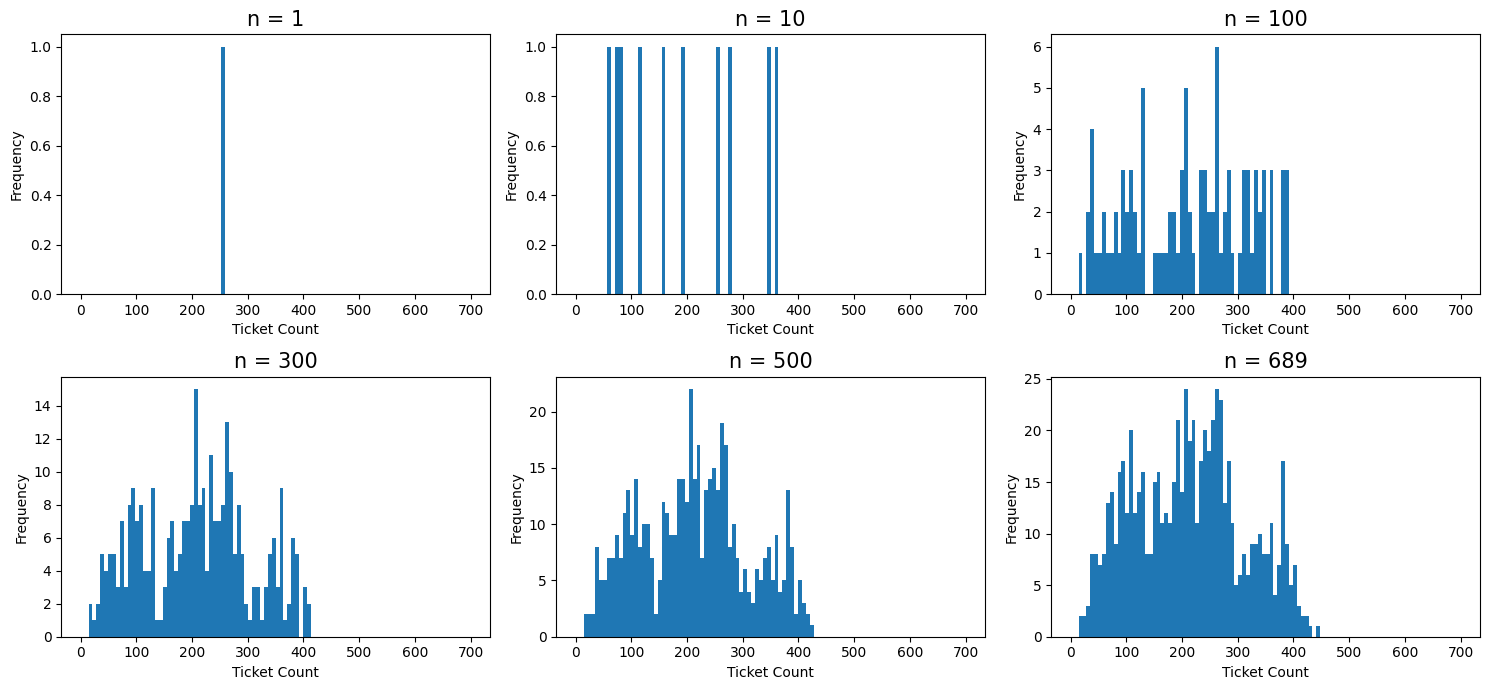

In [76]:
import random

daily_tickets = list(df.groupby('starttime_date').size())
sample_tickets = []

checkpoints = [1, 10, 100, 300, 500, 1000]
binrange = np.linspace(0, 700, 101)

random.shuffle(daily_tickets)

plt.figure(figsize=(15, 7))
plot_count = 1

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())

    
    if (i + 1) in checkpoints or not daily_tickets:
        plt.subplot(2, 3, plot_count)
        plt.hist(sample_tickets, bins=binrange)
        plt.title('n = %d' % (i + 1), fontsize=15)
        plt.xlabel("Ticket Count")
        plt.ylabel("Frequency")
        plot_count += 1

    if not daily_tickets:
        break

plt.tight_layout()
plt.show()


The graphs show that as the sample size n increases from 1 to 689, the distribution of Ticket count frequency becomes smoother and more spread out, with more data points filling in the range from 0 to 700.